In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob
from sklearn.pipeline import Pipeline
import nltk
import re

In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
# clean data
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.metrics import f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization,Embedding
from sklearn.metrics import f1_score, make_scorer, hamming_loss, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_excel('data_waktu.xlsx')

In [ ]:
df = df.loc[:, ['text','category']]
df

,text,category
0,"['fajar', 'co', 'id', 'makassar', 'diduga', 'm...",Malam
1,"['fajar', 'co', 'id', 'makassar', 'kasat', 're...",Pagi
2,"['fajar', 'co', 'id', 'makassar', 'heboh', 'pe...",Dini hari
3,"['fajar', 'co', 'id', 'makassar', 'seorang', '...",Pagi
4,"['fajar', 'co', 'id', 'bantaeng', 'sebuah', 's...",Dini hari
...,...,...
256,"['fajar', 'co', 'id', 'makassar', 'dua', 'dari...",Malam
257,"['fajar', 'co', 'id', 'makassar', 'hh', 'traum...",Siang
258,"['fajar', 'co', 'id', 'makassar', 'seorang', '...",Malam
259,"['fajar', 'co', 'id', 'makassar', 'kasus', 'pe...",Dini hari


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
# clean data with regular expression
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []

def remove_punct(text):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    return text.translate(translator)

stop_words= StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(text):
  text = stop_words_remover_new.remove(text)
  return text

def tokenize(text):
  text = word_tokenize(text)
  return text

df['category'] = df['category'].apply(lambda x:x.split('\t'))
df['text'] = df['text'].apply(lambda x: remove_punct(x))
df['text'] = df['text'].apply(lambda x: stopword(x))
df['text'] = df['text'].apply(lambda x: tokenize(x))
df['text'] = df['text'].apply(lambda x: ' '.join(x))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,category
0,fajar co id makassar diduga melakukan begal pa...,[Malam]
1,fajar co id makassar kasat reskrim polrestabes...,[Pagi]
2,fajar co id makassar heboh pencabulan kota mak...,[Dini hari]
3,fajar co id makassar seorang remaja kota makas...,[Pagi]
4,fajar co id bantaeng sebuah sekolah kabupaten ...,[Dini hari]
...,...,...
256,fajar co id makassar tiga pelaku penganiayaan ...,[Malam]
257,fajar co id makassar hh trauma berat perbuatan...,[Siang]
258,fajar co id makassar seorang pria berinisial a...,[Malam]
259,fajar co id makassar kasus penganiayaan seoran...,[Dini hari]


In [ ]:
df['mean_word_length'] = df['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(10)

,text,category,mean_word_length
0,fajar co id makassar diduga melakukan begal pa...,"[Pelecehan, Kecamatan Tamalanrea, Malam]",6.768868
1,fajar co id makassar kasat reskrim polrestabes...,"[Penganiayaan, Kecamatan Manggala, Pagi]",6.395270
2,fajar co id makassar heboh pencabulan kota mak...,"[Pelecehan, Kecamatan Rappocini, Dini hari]",6.380567
3,fajar co id makassar tiga pria kota makassar t...,"[Pencurian, Kecamatan Rappocini]",6.107034
4,fajar co id luwu timur lanjutan kasus peleceha...,"[Pelecehan, Kecamatan Wotu]",6.287356
5,fajar co id makassar seorang remaja kota makas...,"[Pencurian, Kecamatan Rappocini, Pagi]",6.472527
6,fajar co id bantaeng sebuah sekolah kabupaten ...,"[Pencurian, Kecamatan Pajukukang, Dini hari]",6.768889
7,fajar co id parepare santri berusia 13 tahun s...,"[Penganiayaan, Kota Parepare]",6.664835
8,fajar co id maros setahun lebih masuk daftar p...,"[Pencurian, Kabupaten Maros, Pagi]",6.469841
9,fajar co id makassar aksi pengeroyokan terjadi...,"[Penganiayaan, Kecamatan Rappocini, Siang]",6.431034


In [ ]:
from nltk import tokenize

df['mean_sent_length'] = df['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head(10)

,text,category,mean_word_length,mean_sent_length
0,fajar co id makassar diduga melakukan begal pa...,"[Pelecehan, Kecamatan Tamalanrea, Malam]",6.768868,1646.0
1,fajar co id makassar kasat reskrim polrestabes...,"[Penganiayaan, Kecamatan Manggala, Pagi]",6.395270,2188.0
2,fajar co id makassar heboh pencabulan kota mak...,"[Pelecehan, Kecamatan Rappocini, Dini hari]",6.380567,1822.0
3,fajar co id makassar tiga pria kota makassar t...,"[Pencurian, Kecamatan Rappocini]",6.107034,2323.0
4,fajar co id luwu timur lanjutan kasus peleceha...,"[Pelecehan, Kecamatan Wotu]",6.287356,2535.0
5,fajar co id makassar seorang remaja kota makas...,"[Pencurian, Kecamatan Rappocini, Pagi]",6.472527,1359.0
6,fajar co id bantaeng sebuah sekolah kabupaten ...,"[Pencurian, Kecamatan Pajukukang, Dini hari]",6.768889,1747.0
7,fajar co id parepare santri berusia 13 tahun s...,"[Penganiayaan, Kota Parepare]",6.664835,1394.0
8,fajar co id maros setahun lebih masuk daftar p...,"[Pencurian, Kabupaten Maros, Pagi]",6.469841,2352.0
9,fajar co id makassar aksi pengeroyokan terjadi...,"[Penganiayaan, Kecamatan Rappocini, Siang]",6.431034,1723.0


In [ ]:
# one hot encoding
mlb = MultiLabelBinarizer()
mlb.fit(df["category"])
mlb

MultiLabelBinarizer()

In [ ]:
labels = mlb.classes_
labels

array(['Dini hari', 'Malam', 'Pagi', 'Siang', 'Sore'], dtype=object)

In [ ]:
!pip install seaborn

Label yang telah di-binarize:
     Begal  Dini hari  Kabupaten Bantaeng  Kabupaten Barru  Kabupaten Bone  \
0        0          0                   0                0               0   
1        0          0                   0                0               0   
2        0          1                   0                0               0   
3        0          0                   0                0               0   
4        0          0                   0                0               0   
..     ...        ...                 ...              ...             ...   
839      0          0                   0                0               0   
840      0          1                   0                0               0   
841      0          0                   0                0               0   
842      0          1                   0                0               0   
843      0          0                   0                0               0   

     Kabupaten Bulukumba  Kabupat

<ipython-input-29-84398acb9649>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kejahatan_counts, x='Jenis Kejahatan', y='Jumlah', palette='viridis')


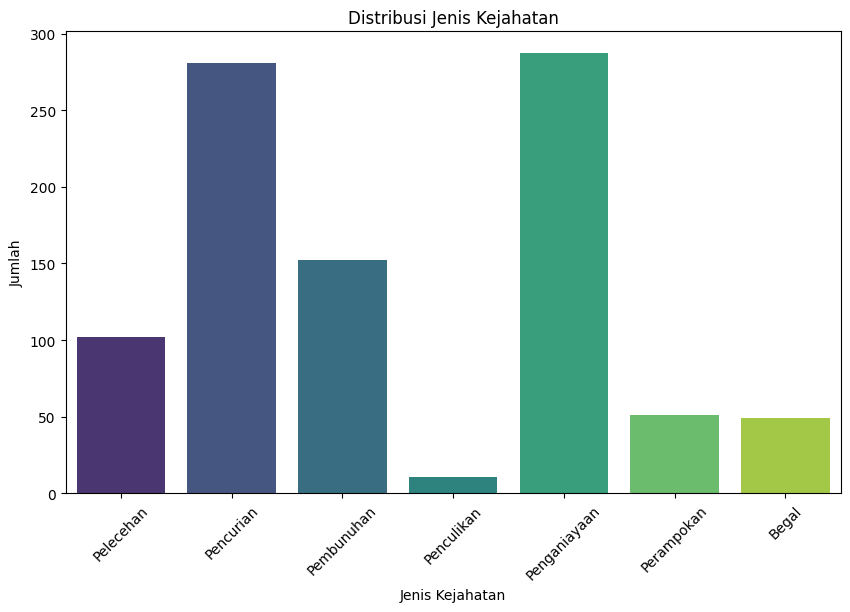


Jumlah setiap jenis kejahatan untuk label yang dipilih:
Pagi         53
Siang        33
Sore         23
Malam        75
Dini hari    78
dtype: int64


<ipython-input-29-84398acb9649>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_waktu_counts, x='Waktu', y='Jumlah', palette='viridis')


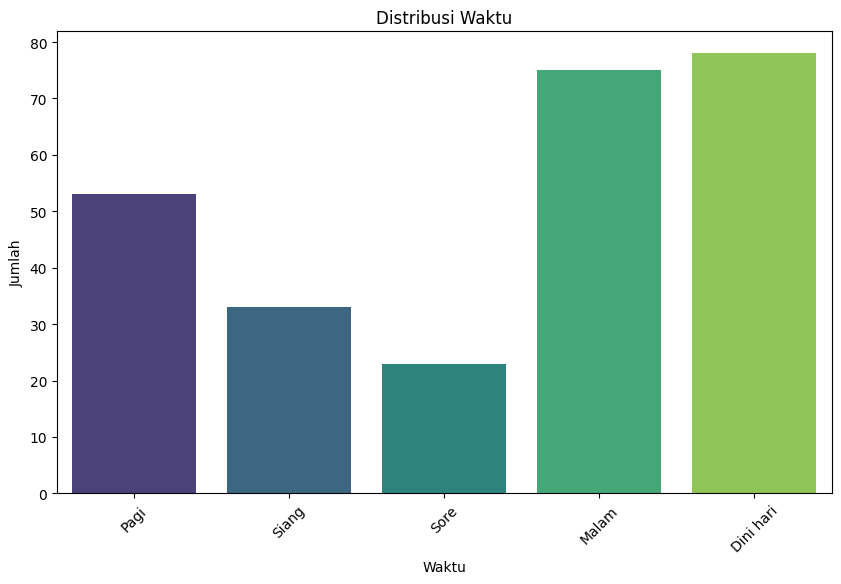


Jumlah setiap jenis kejahatan untuk label yang mengandung kata 'Kecamatan':
Kecamatan Alla              1
Kecamatan Angkona           1
Kecamatan Awangpone         2
Kecamatan Bacukiki          1
Kecamatan Baebunta          4
                           ..
Kecamatan Wara Utara        1
Kecamatan Wasuponda         1
Kecamatan Watang Pulu       3
Kecamatan Watang Sawitto    2
Kecamatan Wotu              4
Length: 136, dtype: int64


<ipython-input-29-84398acb9649>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kejahatan_counts, x='Jenis Kejahatan', y='Jumlah', palette='viridis')


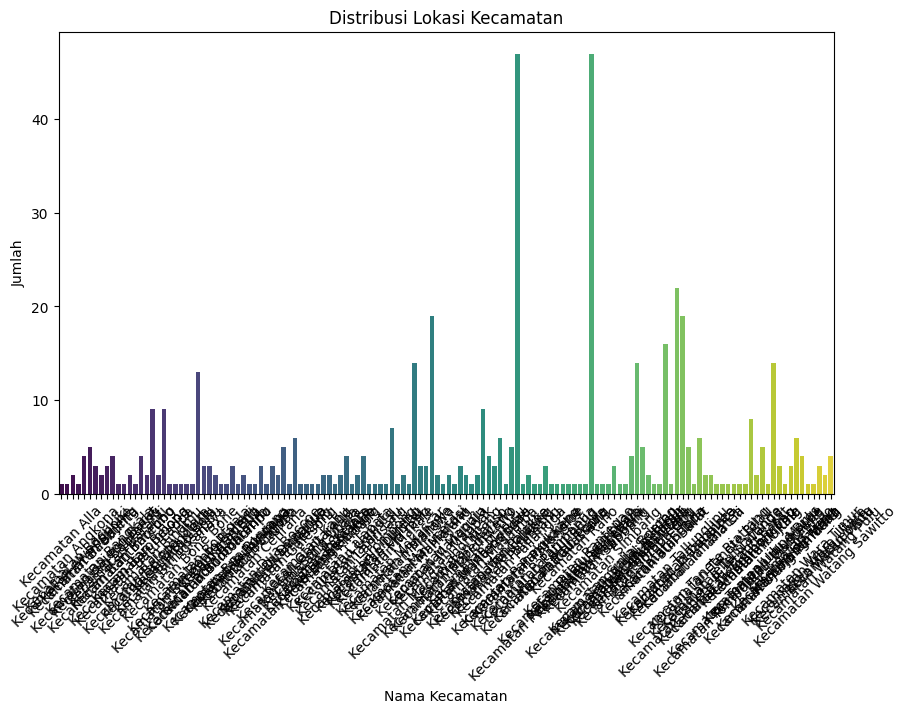


Jumlah setiap jenis kejahatan untuk label yang mengandung kata 'Kecamatan':
Kabupaten Bantaeng              10
Kabupaten Barru                  1
Kabupaten Bone                   8
Kabupaten Bulukumba             10
Kabupaten Enrekang               2
Kabupaten Gowa                  32
Kabupaten Jeneponto              9
Kabupaten Kepulauan Selayar      2
Kabupaten Luwu                   3
Kabupaten Luwu Timur             7
Kabupaten Luwu Utara             4
Kabupaten Maros                 17
Kabupaten Pangkep                4
Kabupaten Pinrang                7
Kabupaten Sidrap                 4
Kabupaten Sinjai                 8
Kabupaten Soppeng                3
Kabupaten Takalar                4
Kabupaten Tana Toraja            3
Kabupaten Wajo                   6
Kota Makassar                  148
Kota Palopo                      9
Kota Parepare                   10
dtype: int64


<ipython-input-29-84398acb9649>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kabupaten_counts, x='Kabupaten', y='Jumlah', palette='viridis')


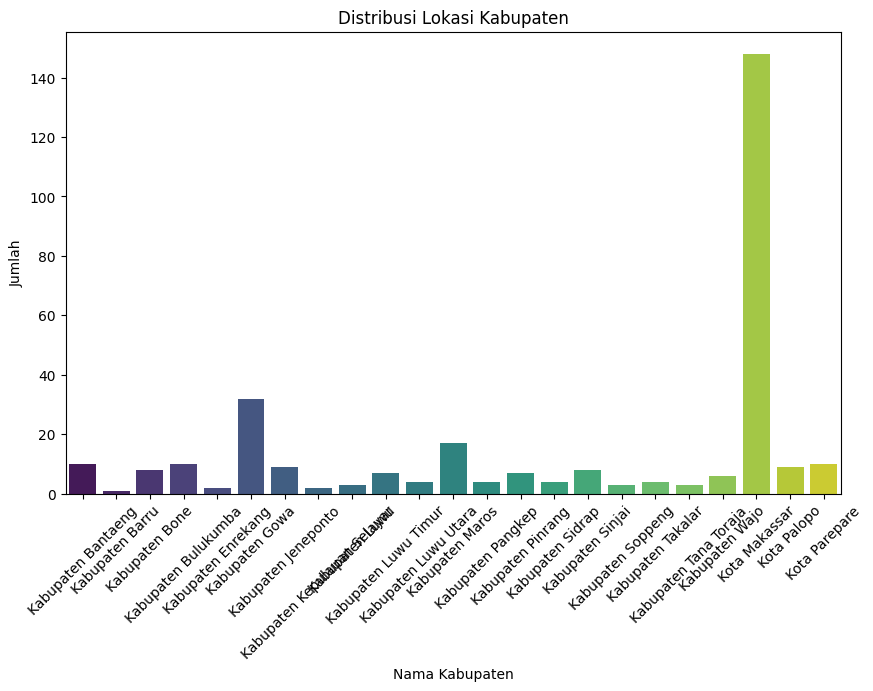

In [ ]:
# Membuat DataFrame untuk label yang telah di-binarize
df_labels = pd.DataFrame(y, columns=mlb.classes_)
print("Label yang telah di-binarize:")
print(df_labels)

labels_1 = ['Pelecehan', 'Pencurian', 'Pembunuhan', 'Penculikan', 'Penganiayaan', 'Perampokan', 'Begal' ]
df_labels_1 = df_labels[labels_1]

kejahatan_counts = df_labels_1.sum(axis=0)
print("\nJumlah setiap jenis kejahatan untuk label yang dipilih:")
print(kejahatan_counts)

df_kejahatan_counts = kejahatan_counts.reset_index()
df_kejahatan_counts.columns = ['Jenis Kejahatan', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_kejahatan_counts, x='Jenis Kejahatan', y='Jumlah', palette='viridis')
plt.title('Distribusi Jenis Kejahatan')
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


labels_2 = ['Pagi', 'Siang', 'Sore', 'Malam', 'Dini hari']
df_labels_2 = df_labels[labels_2]

waktu_counts = df_labels_2.sum(axis=0)
print("\nJumlah setiap jenis kejahatan untuk label yang dipilih:")
print(waktu_counts)

df_waktu_counts = waktu_counts.reset_index()
df_waktu_counts.columns = ['Waktu', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_waktu_counts, x='Waktu', y='Jumlah', palette='viridis')
plt.title('Distribusi Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

labels_3 = [col for col in df_labels.columns if 'Kecamatan' in col]
df_labels_3 = df_labels[labels_3]

kejahatan_counts = df_labels_3.sum(axis=0)
print("\nJumlah setiap jenis kejahatan untuk label yang mengandung kata 'Kecamatan':")
print(kejahatan_counts)

df_kejahatan_counts = kejahatan_counts.reset_index()
df_kejahatan_counts.columns = ['Jenis Kejahatan', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_kejahatan_counts, x='Jenis Kejahatan', y='Jumlah', palette='viridis')
plt.title('Distribusi Lokasi Kecamatan')
plt.xlabel('Nama Kecamatan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

labels_4 = [col for col in df_labels.columns if 'Kabupaten' in col or 'Kota' in col]
df_labels_4 = df_labels[labels_4]

kabupaten_counts = df_labels_4.sum(axis=0)
print("\nJumlah setiap jenis kejahatan untuk label yang mengandung kata 'Kecamatan':")
print(kabupaten_counts)

df_kabupaten_counts = kabupaten_counts.reset_index()
df_kabupaten_counts.columns = ['Kabupaten', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_kabupaten_counts, x='Kabupaten', y='Jumlah', palette='viridis')
plt.title('Distribusi Lokasi Kabupaten')
plt.xlabel('Nama Kabupaten')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Label yang telah di-binarize:
     Kabupaten Bantaeng  Kabupaten Barru  Kabupaten Bone  Kabupaten Bulukumba  \
0                     0                0               0                    0   
1                     0                0               0                    0   
2                     0                0               0                    0   
3                     0                0               0                    0   
4                     0                0               0                    0   
..                  ...              ...             ...                  ...   
788                   0                0               0                    0   
789                   0                0               0                    0   
790                   0                0               0                    0   
791                   0                0               0                    0   
792                   0                0               0                    0  

<ipython-input-30-20494a907cbd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_kabupaten_counts, x='Kabupaten', y='Jumlah', palette='viridis')


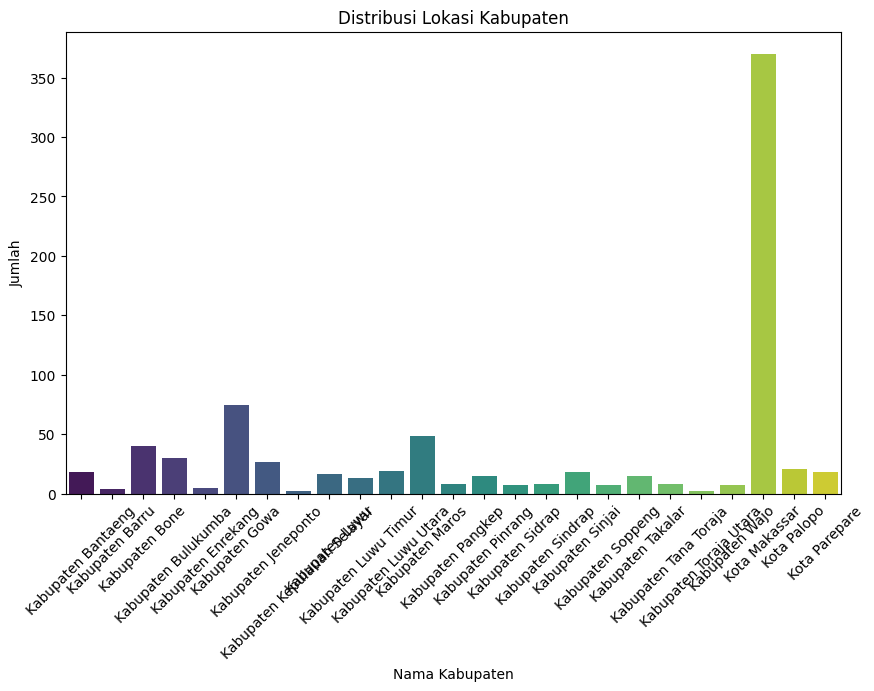

In [ ]:
# Membuat DataFrame untuk label yang telah di-binarize
df_labels = pd.DataFrame(y, columns=mlb.classes_)
print("Label yang telah di-binarize:")
print(df_labels)

labels_4 = [col for col in df_labels.columns if 'Kabupaten' in col or 'Kota' in col]
df_labels_4 = df_labels[labels_4]

kabupaten_counts = df_labels_4.sum(axis=0)
print("\nJumlah setiap jenis kejahatan untuk label yang mengandung kata 'Kecamatan':")
print(kabupaten_counts)

df_kabupaten_counts = kabupaten_counts.reset_index()
df_kabupaten_counts.columns = ['Kabupaten', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_kabupaten_counts, x='Kabupaten', y='Jumlah', palette='viridis')
plt.title('Distribusi Lokasi Kabupaten')
plt.xlabel('Nama Kabupaten')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Label yang telah di-binarize:
     Dini hari  Malam  Pagi  Siang  Sore
0            0      1     0      0     0
1            0      0     1      0     0
2            1      0     0      0     0
3            0      0     1      0     0
4            1      0     0      0     0
..         ...    ...   ...    ...   ...
256          0      1     0      0     0
257          0      0     0      1     0
258          0      1     0      0     0
259          1      0     0      0     0
260          1      0     0      0     0

[261 rows x 5 columns]

Jumlah setiap jenis kejahatan untuk label yang dipilih:
Pagi         53
Siang        33
Sore         23
Malam        75
Dini hari    78
dtype: int64


<ipython-input-48-fc37488b6b9c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_waktu_counts, x='Waktu', y='Jumlah', palette='viridis')


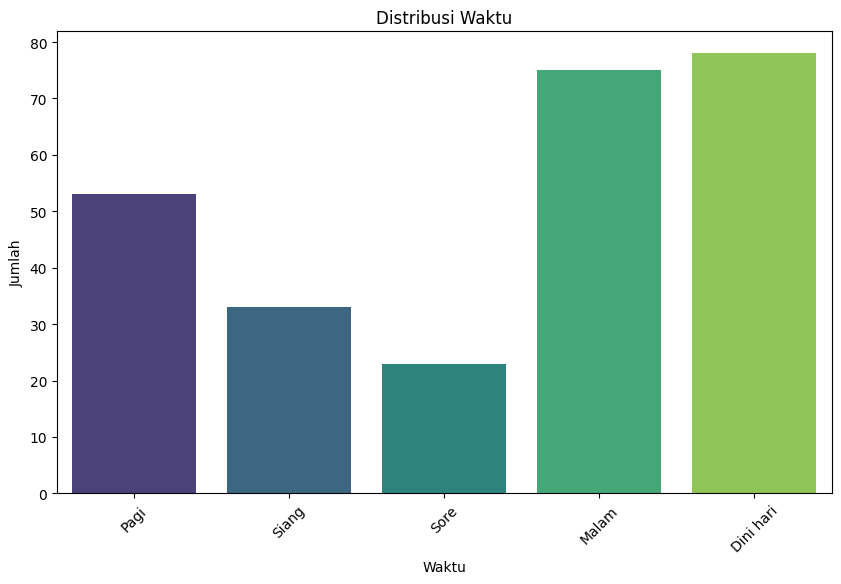

In [ ]:
# Membuat DataFrame untuk label yang telah di-binarize
df_labels = pd.DataFrame(y, columns=mlb.classes_)
print("Label yang telah di-binarize:")
print(df_labels)

labels_2 = ['Pagi', 'Siang', 'Sore', 'Malam', 'Dini hari']
df_labels_2 = df_labels[labels_2]

waktu_counts = df_labels_2.sum(axis=0)
print("\nJumlah setiap jenis kejahatan untuk label yang dipilih:")
print(waktu_counts)

df_waktu_counts = waktu_counts.reset_index()
df_waktu_counts.columns = ['Waktu', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_waktu_counts, x='Waktu', y='Jumlah', palette='viridis')
plt.title('Distribusi Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [ ]:
y = mlb.transform(df["category"])
y

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [ ]:
X = df['text'].tolist()
X

['fajar co id makassar diduga melakukan begal payudara mahasiswa universitas hasanuddin unhas makassar berinisial m 22 berurusan polisi video penangkapan dirinya usai diduga melakukan perbuatan terlarang tersebar luas platform media sosial medsos kasat reskrim polrestabes makassar kompol devi sujana mengatakan peristiwa tersebut terjadi jalan kera kera kecamatan tamalanrea rabu 21 2 2024 pukul 19 00 wita diceritakan devi korban berinisial da 21 merupakan mahasiswi kampusnya mengendarai motor mengambil spanduk pulang perjalanan tiba tiba belakang terduga pelaku menggunakan motor langsung memegang ujar devi awak media kamis 22 2 2024 siang melakukan aksinya devi menuturkan pelaku langsung melarikan diri korban melakukan pengejaran pelaku didapat dijatuhkan sepeda motornya situ warga berdatangan mengamankan pelaku devi menuturkan atas laporan diterima pihaknya devi mengatakan terduga pelaku digelandang mapolrestabes makassar pelaku langsung diamankan warga dibawa polrestabes makassar dila

In [ ]:
# train test split protect overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(214, 47, 214, 47)

In [ ]:
# tokenized for deep learning
tokenizer = Tokenizer(num_words=4500, lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, padding= 'post',maxlen = 2500)
X_test = pad_sequences(X_test,padding='post', maxlen = 2500)

In [ ]:
# Save results to Excel
results_df.to_excel('cnn_experiment_results.xlsx', index=False)
print("Results have been saved to cnn_experiment_results.xlsx")

Results have been saved to cnn_experiment_results.xlsx


In [ ]:
# cnn model (input length = 500)
model = Sequential()

model.add(Embedding(len(tokenizer.word_index) + 1,50,input_length=2500))
model.add(Dropout(0.5))
model.add(Conv1D(500,3,padding='valid',activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(300))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1]))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


history = model.fit(X_train, y_train,batch_size=32,epochs=30,validation_data=(X_test, y_test))


temp_array = np.arange(0.05,1.0,0.05)
scores = []

for probability in temp_array:
    predict_cnn = model.predict(X_test)
    predict_cnn[predict_cnn>=probability] = 1
    predict_cnn[predict_cnn<probability] = 0
    scores.append(tuple((f1_score(y_test, predict_cnn, average="samples"),probability)))
    print("=============================================================")
    print((f1_score(y_test, predict_cnn, average="samples"),probability))
    print("Hamming loss:",hamming_loss(y_test,predict_cnn))
    print("=============================================================")

Epoch 1/30
7/7 [==============================] - 11s 2s/step - loss: 0.6248 - accuracy: 0.2290 - val_loss: 0.5801 - val_accuracy: 0.3191
Epoch 2/30
7/7 [==============================] - 9s 1s/step - loss: 0.5054 - accuracy: 0.3178 - val_loss: 0.4948 - val_accuracy: 0.3191
Epoch 3/30
7/7 [==============================] - 10s 1s/step - loss: 0.4987 - accuracy: 0.2850 - val_loss: 0.4868 - val_accuracy: 0.3191
Epoch 4/30
7/7 [==============================] - 10s 1s/step - loss: 0.4908 - accuracy: 0.2850 - val_loss: 0.5056 - val_accuracy: 0.3191
Epoch 5/30
7/7 [==============================] - 8s 1s/step - loss: 0.4884 - accuracy: 0.3037 - val_loss: 0.5121 - val_accuracy: 0.3404
Epoch 6/30
7/7 [==============================] - 10s 1s/step - loss: 0.4873 - accuracy: 0.3037 - val_loss: 0.5037 - val_accuracy: 0.3191
Epoch 7/30
7/7 [==============================] - 10s 1s/step - loss: 0.4900 - accuracy: 0.2617 - val_loss: 0.4969 - val_accuracy: 0.3191
Epoch 8/30
7/7 [====================

In [ ]:
best_threshold = max(scores, key=lambda x: x[0])
print(f"Best F1 Score : {best_threshold[0]} at Threshold: {best_threshold[1]}")

Best F1 Score : 0.4957446808510636 at Threshold: 0.1


In [ ]:
from sklearn.metrics import roc_auc_score

# Melakukan prediksi probabilitas pada data uji
y_pred_prob = model.predict(X_test)

roc_auc_scores = []

for i in range(y_test.shape[1]):
    if len(np.unique(y_test[:, i])) > 1:  # Pastikan ada lebih dari satu kelas untuk label ini
        roc_auc = roc_auc_score(y_test[:, i], y_pred_prob[:, i])
        roc_auc_scores.append(roc_auc)

# Ambil rata-rata dari ROC AUC untuk semua label
average_roc_auc = np.mean(roc_auc_scores)
print(f'Average ROC AUC: {average_roc_auc}')


2/2 [==============================] - 1s 149ms/step
Average ROC AUC: 0.7118997668997669


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, hamming_loss

# Pilih jumlah contoh yang akan ditampilkan
num_examples = 30

# Pilih secara acak beberapa sampel dari dataset test
random_indices = np.random.choice(len(X_test), num_examples, replace=False)
sample_texts = X_test[random_indices]
sample_labels = y_test[random_indices]

# Buat prediksi menggunakan model yang telah dilatih
predictions = model.predict(sample_texts)

# Tentukan ambang batas untuk mengonversi probabilitas menjadi label biner
threshold = 0.5  # Anda bisa menyesuaikan threshold sesuai kebutuhan

# Konversi probabilitas menjadi label biner
predicted_labels = (predictions >= threshold).astype(int)

# Dekode label yang di-encode kembali ke kategori asli
decoded_predicted_labels = mlb.inverse_transform(predicted_labels)
decoded_actual_labels = mlb.inverse_transform(sample_labels)

# Tampilkan hasil
print("Example Data and Predictions:")
print("-----------------------------------")
for i in range(num_examples):
    print("Text:", tokenizer.sequences_to_texts([sample_texts[i]]))
    print("Actual Category:", decoded_actual_labels[i])
    print("Predicted Category:", decoded_predicted_labels[i])
    print("-----------------------------------")

# Hitung akurasi (untuk multilabel, gunakan metrik yang sesuai)
# Dalam hal ini kita akan menghitung F1-score dan Hamming loss
f1 = f1_score(sample_labels, predicted_labels, average='samples')
hamming = hamming_loss(sample_labels, predicted_labels)
print("F1 Score on Example Data:", f1)
print("Hamming Loss on Example Data:", hamming)


1/1 [==============================] - 0s 235ms/step
Example Data and Predictions:
-----------------------------------
Text: ['kasus sainuddin 53 warga balangriri desa kecamatan kabupaten sulawesi selatan sulsel selasa 1752022 pasalnya sainuddin menghabisi nyawa istri anaknya sendiri membunuh keduanya kemudian bunuh diri lehernya seutas tali berdasarkan keterangan kapolsek akp asri sainuddin mengalami gangguan menderita gangguan sejak puluhan tahun sejak tiga hari terakhir stok obat sainuddin habis tersebut diduga menjadi dirinya lepas habis obatnya puskesmas habis kota habis jelasnya beberapa tahun lalu sainuddin pernah cekcok hampir memarangi sendiri sekadar diketahui dilakukan sainuddin 53 tersebut terjadi selasa 1752022 pukul 0330 dini hari sainuddin menghabisi nyawa istrinya muliati 51 tahun anaknya anti 30 tahun akp asri menceritakan kasus tersebut warga balangriri akp asri suara teriakan korban terdengar warga rumah didengar warga suara teriakan kemudian dilaporkan polsek pelaku

In [ ]:
# cnn model (input length = 500)

filter_sizes = [100, 200, 300, 400, 500]
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
results = []

for filters in filter_sizes:
    for dropout_rate in dropout_rates:
        # Define the model
        model = Sequential()

        model.add(Embedding(len(tokenizer.word_index) + 1,50,input_length=2500))
        model.add(Dropout(dropout_rate))
        model.add(Conv1D(filters,3,padding='valid',activation='relu', strides=1))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(300))
        model.add(Dropout(dropout_rate))
        model.add(Activation('relu'))
        model.add(Dense(y_train.shape[1]))
        model.add(Activation('sigmoid'))

        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

        # Evaluate the model
        y_pred_prob = model.predict(X_test)
        temp_array = np.arange(0.05, 1.0, 0.05)
        scores = []

        history = model.fit(X_train, y_train,batch_size=32,epochs=30,validation_data=(X_test, y_test))


        for probability in temp_array:
            predict_cnn = model.predict(X_test)
            predict_cnn[predict_cnn >= probability] = 1
            predict_cnn[predict_cnn < probability] = 0
            scores.append(tuple((f1_score(y_test, predict_cnn, average="samples"),probability)))
            f1 = f1_score(y_test, predict_cnn, average="samples")
            hamming = hamming_loss(y_test, predict_cnn)

            if f1 > best_f1_score:
                best_f1_score = f1
                best_hamming_loss = hamming
                best_probability = probability

        # Calculate ROC AUC
        roc_auc_scores = []
        for i in range(y_test.shape[1]):
            if len(np.unique(y_test[:, i])) > 1:
                roc_auc = roc_auc_score(y_test[:, i], y_pred_prob[:, i])
                roc_auc_scores.append(roc_auc)
        average_roc_auc = np.mean(roc_auc_scores)

        # Store the results
        results.append({
            'filters': filters,
            'dropout': dropout_rate,
            'best_f1_score': best_f1_score,
            'best_hamming_loss': best_hamming_loss,
            'best_probability': best_probability,
            'average_roc_auc': average_roc_auc
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print("Best Configuration:")
best_result = results_df.loc[results_df['best_f1_score'].idxmax()]
print(best_result)

print("\nAll Results:")
print(results_df)

5/5 [==============================] - 0s 66ms/step
Epoch 1/30
22/22 [==============================] - 10s 415ms/step - loss: 0.5854 - accuracy: 0.0043 - val_loss: 0.3449 - val_accuracy: 0.0066
Epoch 2/30
22/22 [==============================] - 7s 323ms/step - loss: 0.1246 - accuracy: 0.0101 - val_loss: 0.0569 - val_accuracy: 0.0197
Epoch 3/30
22/22 [==============================] - 8s 382ms/step - loss: 0.0589 - accuracy: 0.0188 - val_loss: 0.0520 - val_accuracy: 0.0132
Epoch 4/30
22/22 [==============================] - 7s 298ms/step - loss: 0.0537 - accuracy: 0.0145 - val_loss: 0.0518 - val_accuracy: 0.0263
Epoch 5/30
22/22 [==============================] - 8s 389ms/step - loss: 0.0527 - accuracy: 0.0145 - val_loss: 0.0517 - val_accuracy: 0.0132
Epoch 6/30
22/22 [==============================] - 6s 296ms/step - loss: 0.0524 - accuracy: 0.0202 - val_loss: 0.0516 - val_accuracy: 0.0132
Epoch 7/30
22/22 [==============================] - 8s 386ms/step - loss: 0.0523 - accuracy: 0.

In [ ]:
set = pd.read_excel("test.xlsx")

In [ ]:
# clean data with regular expression
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []

def remove_punct(text):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    return text.translate(translator)

stop_words= StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(text):
  text = stop_words_remover_new.remove(text)
  return text

def tokenize(text):
  text = word_tokenize(text)
  return text

set['text'] = set['text'].apply(lambda x: remove_punct(x))
set['text'] = set['text'].apply(lambda x: stopword(x))
set['text'] = set['text'].apply(lambda x: tokenize(x))
set['text'] = set['text'].apply(lambda x: ' '.join(x))
set

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text
0,fajar co id makassar pelaku pencurian kantor b...
1,fajar co id makassar pelaku pembobolan balai k...
2,fajar co id makassar nasib apes menimpa wanita...
3,fajar co id makassar kasus penculikan bocah be...
4,fajar co id makassar lelaki berinisial aa mend...
...,...
89,guru viral media sosial pelecehan seksual memb...
90,hukum kriminal mabes polri ungkap kaitan kasus...
91,polri tindaklanjuti kasus dugaan pencabulan an...
92,sejumlah kalangan mendesak kepolisian membuka ...


In [ ]:
X_val = set['text'].tolist()
X_val

['fajar co id makassar pelaku pencurian kantor balai kota makassar berinisial am rm kini ditahan kantor polisi bersekongkol menggasak sejumlah aset milik pemkot makassar kasat reskrim polrestabes makassar kompol jamal fathur rakhman mengatakan alasan oknum pegawai melakukan demikinan pelaku am menikah nekat menggasak barang bersama rm am mau pakai modal pasca nikah dibantu rm keduanya tak punya hubungan keluarga dibantu hasilnya dijual luar makasaar katanya kamis 16 9 2021 sebabnya am menggasak barang milik pemkot makassar mulai sikat gigi teko ikat pinggang hingga mesin cetak print lalu dijual dipakai membiayai modal pasca acara pernikahan am jauh beda am pelaku rm nekat melakukan kebutuhan ekonomi hingga nekat melakukan tindakan pidana kantor pemkot makassar sejak maret 2021 informasi dihimpun pelaku am merupakan pegawai lembaga sukarela lembaga pemantau independen pengadaan barang jasa rm merupakan pegawai kontrak sekretariat bidang hukum rm am mencuri barang gedung balai kota makas

In [ ]:
# tokenized for deep learning
tokenizer = Tokenizer(num_words=4500, lower=True)
tokenizer.fit_on_texts(X_val)

X_train = tokenizer.texts_to_sequences(X_val)

X_val = pad_sequences(X_train, padding= 'post',maxlen = 1500)

In [ ]:
# Asumsikan X_test adalah testing set tanpa label
predictions = model.predict(X_val)

# Mengambil label dengan probabilitas tertinggi dari hasil prediksi
predicted_labels = np.argmax(predictions, axis=1)


3/3 [==============================] - 0s 42ms/step


In [ ]:
predicted_labels = (predictions >= threshold).astype(int)

decoded_predicted_labels = mlb.inverse_transform(predicted_labels)

In [ ]:
import pandas as pd

# Membuat DataFrame dengan hasil prediksi
results = pd.DataFrame({'Text': set['text'], 'PredictedLabel': decoded_predicted_labels})

# Menyimpan hasil ke file CSV
results.to_csv('predicted_labels.csv', index=False)
